# **Anxiety Medicine Effect on Memory**

## Table of Contents

1. **Introduction**
2. **Set Up Data Analysis Environment**
3. **View Data Layout** 
    <br> 3.1 Relabel 
4. **Exploratory Data Analysis** <br>
 4.1 **Difference by Drug: Visual** <br>
     4.1.A Statistical Significance <br>
 4.1.B Statistical Significance Results <br>
 4.2 **Difference by Drug and Dosage** <br>
  4.2.A Statistical Significance <br>
4.2.B Statistical Significance Results <br>
 4.3 **Difference by Drug Dosage and Happy/Sad Prime** <br>
     4.3.A Statistical Significance <br>
     4.3.B Statistical Significance Results
5. **Search for Major Group Discrepencies** <br>
   5.1 Discrepency Results
6. **Conclusion**




## 1. Introduction 

**Context** 

An independent measures design experiments the effects of anti-anxiety medicine on memory recall on a group of novel Islanders whom mimic real-life humans in response to external factors. Participants were seperated into a different group for each drug between three different dosage levels and two different primes. They were given a memory recall test before taking the drugs and again 

Participants were also primed with either happy or sad memories 10 minutes before the recall test. 

There were three drugs of interest used (Known-as) [Dosage: low, medium, high]:

A - Alprazolam (Xanax, Long-term) [1mg/3mg/5mg] 
<br>T - Triazolam (Halcion, Short-term) [.25mg/.5mg/.75mg]
<br>S - Sugar Tablet (Placebo) [1tab/2tabs/3tabs]                                   

**Main questions of interest:**
<br> How does each drug affect memory?
<br> Does the dosage level of the drug have an effect?
<br> Does either prime have a significant effect?
<br> Does the age of participants make a noticable difference on the drugs' effect?

**Method:** 
<br> Clear visualization to perceive noticable differences between variables.
<br> One way ANOVA (Analysis of variance) tests for significant difference of post-drug memory recall scores by the drug.
<br> Two-Sample t-test to find significant difference between groups.
 





## 2. Set Up Data Analysis Environment

In [3]:
#import libraries for Data Analysis 
import numpy as np
import pandas as pd
import seaborn as sns
from scipy import stats
%matplotlib inline
import matplotlib.pyplot as plt

In [4]:
#import data regarding anti-anxiety
df = pd.read_csv(r'C:\Users\jdgoe\OneDrive\Documents\Analyses\Islander_data.csv')
#view columns and value types
df.columns

Index(['first_name', 'last_name', 'age', 'Happy_Sad_group', 'Dosage', 'Drug',
       'Mem_Score_Before', 'Mem_Score_After', 'Diff'],
      dtype='object')

# 3. View data layout <a name="viewdl"></a>

In [5]:
#view head of data frame for idea of the layout
df.head()

,first_name,last_name,age,Happy_Sad_group,Dosage,Drug,Mem_Score_Before,Mem_Score_After,Diff
0,Bastian,Carrasco,25,H,1,A,63.5,61.2,-2.3
1,Evan,Carrasco,52,S,1,A,41.6,40.7,-0.9
2,Florencia,Carrasco,29,H,1,A,59.7,55.1,-4.6
3,Holly,Carrasco,50,S,1,A,51.7,51.2,-0.5
4,Justin,Carrasco,52,H,1,A,47.0,47.1,0.1


In [6]:
#evaluate data types for any wrong data types
df.dtypes

first_name           object
last_name            object
age                   int64
Happy_Sad_group      object
Dosage                int64
Drug                 object
Mem_Score_Before    float64
Mem_Score_After     float64
Diff                float64
dtype: object

### 3.1 Relabel

In [7]:
df['Dosage'].value_counts().to_frame() #see if IV is distributed properly

,Dosage
1,67
2,66
3,65


In [23]:
# relabel dosage with words
df['Dosage'] = df.Dosage.replace({1: "low", 2: "medium", 3: "high"})
df.Dosage.value_counts()

low       67
medium    66
high      65
Name: Dosage, dtype: int64

In [8]:
df["Drug"] = df.Drug.replace({'A': "Alprazolam", 'S': "Placebo", 'T': "Triazolam"}) #relabel drug initials with name

## 4. Exploratory Data Analysis

In [9]:
# create column with the difference of the score after relative to before
df['Score_Diff'] = df['Mem_Score_After'] - df['Mem_Score_Before']

### 4.1 Difference by Drug Visual

[Text(0.5, 1.0, 'Score Differential Post-Dosage Between Drugs'),
 Text(0.5, 0, 'Drug'),
 Text(0, 0.5, 'Score Differential')]

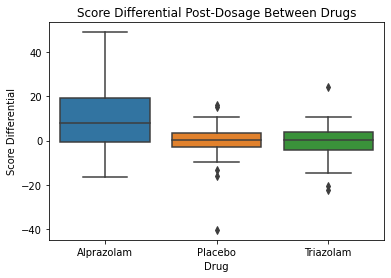

In [10]:
#evaluate difference by drug
box_plot=sns.boxplot(x="Drug", y="Score_Diff", data=df)
box_plot.set(title="Score Differential Post-Dosage Between Drugs", xlabel="Drug", ylabel="Score Differential")


### 4.1.A Statistical Significance
<br> One-way ANOVA (Analysis of Variance) to find if there is statistical significance for memory recall scores between drugs

In [11]:
Drug_diff = df[['Drug', 'Score_Diff']].groupby(['Drug'])
Drug_diff.describe()

Score_Diff                                                   
                count      mean        std   min   25%  50%    75%   max
Drug                                                                    
Alprazolam       67.0  9.470149  13.253930 -16.3 -0.75  7.9  19.25  49.0
Placebo          66.0 -0.171212   7.499923 -40.4 -2.80  0.3   3.40  16.0
Triazolam        65.0 -0.587692   7.104521 -22.2 -4.20  0.2   4.00  24.1

In [13]:
# one-way ANOVA (Analysis of Variance) to find significance
df_ANOVA = df[['Drug', 'Score_Diff']].groupby(['Drug'])
f_val, p_val = stats.f_oneway(df_ANOVA.get_group('Alprazolam')['Score_Diff'], df_ANOVA.get_group('Placebo')['Score_Diff'], df_ANOVA.get_group('Triazolam')['Score_Diff'])

print("ANOVA results: F=", f_val, ", P =", p_val)

ANOVA results: F= 22.711288522955336 , P = 1.359214288302846e-09


In [14]:
f_val, p_val = stats.f_oneway(df_ANOVA.get_group('Alprazolam')['Score_Diff'], df_ANOVA.get_group('Placebo')['Score_Diff'])

print("ANOVA results: F=", f_val, ", P =", p_val)

ANOVA results: F= 26.54851728024965 , P = 9.224444877250116e-07


In [16]:
f_val, p_val = stats.f_oneway(df_ANOVA.get_group('Alprazolam')['Score_Diff'],df_ANOVA.get_group('Triazolam')['Score_Diff'])

print("ANOVA results: F=", f_val, ", P =", p_val)

ANOVA results: F= 29.267894923292218 , P = 2.9269704991684483e-07


In [15]:
f_val, p_val = stats.f_oneway(df_ANOVA.get_group('Placebo')['Score_Diff'], df_ANOVA.get_group('Triazolam')['Score_Diff'])

print("ANOVA results: F=", f_val, ", P =", p_val)

ANOVA results: F= 0.1064055399885205 , P = 0.7448026760869265


### 4.1.B Statistical Significance Results
<br> A. Significant difference among all drugs.
<br> B. Alprazolam significantly higher difference than both the Placebo and Triazolam
<br> C. No significant difference between Placebo and Triazolam

### 4.2 Difference by Drug and Dosage Visual

[Text(0.5, 1.0, 'Score Differential Post-Dosage Between Dosage by Drug'),
 Text(0.5, 0, 'Dosage Level'),
 Text(0, 0.5, 'Score Differential')]

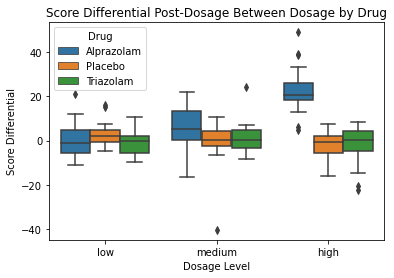

In [27]:
#evaluate difference by dosage and drug
box_plot = sns.boxplot(x="Dosage", y="Score_Diff", hue='Drug', data=df)
box_plot.set(title="Score Differential Post-Dosage Between Dosage by Drug", xlabel="Dosage Level", ylabel="Score Differential")


In [79]:
drug_dose_diff_describe = df[['Drug', 'Dosage', 'Score_Diff']].groupby(['Drug', 'Dosage'])
drug_dose_diff_describe.describe()

Score_Diff                                             \
                       count       mean        std   min     25%    50%   
Drug       Dosage                                                         
Alprazolam high         22.0  22.640909  10.404837   4.6  18.500  20.50   
           low          23.0   0.304348   8.277378 -11.2  -5.600  -1.30   
           medium       22.0   5.881818   9.210069 -16.3   0.425   5.30   
Placebo    high         22.0  -2.145455   6.059210 -16.0  -5.675  -0.50   
           low          22.0   2.386364   5.257312  -4.8  -0.850   1.85   
           medium       22.0  -0.754545   9.922592 -40.4  -2.575   0.05   
Triazolam  high         21.0  -1.723810   8.767662 -22.2  -4.500   0.20   
           low          22.0  -1.240909   5.530148  -9.8  -5.600   0.00   
           medium       22.0   1.150000   6.717975  -8.2  -3.400   0.35   

                                 
                      75%   max  
Drug       Dosage                
Alprazolam high    25.825  49.0  
           low      4.700  21.1  
           medium  13.325  22.2  
Placebo    high     2.150   7.3  
           low      4.600  16.0  
           medium   4.125  10.6  
Triazolam  high     4.500   8.6  
           low      1.950  10.6  
           medium   4.975  24.1

Observations: High dose of drug A has significantly higher difference of test scores. Medium dose of drug A has a median higher than the upper quartile of the other drugs with medium dosage.

### 4.2.A Statistical Significance for Score Differential Between the Dosage and Drug

In [69]:
drug_dose_diff = df[['Drug', 'Dosage', 'Score_Diff']].groupby(['Drug', 'Dosage'],as_index=False).mean()

In [70]:
ddd_pivot = drug_dose_diff.pivot(index='Drug', columns='Dosage')
ddd_pivot

Score_Diff                    
Dosage           high       low    medium
Drug                                     
Alprazolam  22.640909  0.304348  5.881818
Placebo     -2.145455  2.386364 -0.754545
Triazolam   -1.723810 -1.240909  1.150000

In [ ]:
T = df[['Drug', 'Dosage', 'Score_Diff']].groupby(['Drug','Dosage']) #Create frame for T-test
T.head()

In [26]:
from scipy import stats as st
t1 = T.get_group(('Alprazolam', 'high'))['Score_Diff']
t2 = T.get_group(('Alprazolam', 'medium'))['Score_Diff']
st.ttest_ind(a=t1, b=t2, equal_var=True) #T-test for high dosage Aplrazolam and medium dosage Alprazolam

Ttest_indResult(statistic=5.65700300191181, pvalue=1.2353336426622446e-06)

In [44]:
t3 = T.get_group(('Alprazolam', 'low'))['Score_Diff']
st.ttest_ind(a=t2, b=t3, equal_var=True) #T-test for medium dosage Alprazolam and low dosage Alprazolam

Ttest_indResult(statistic=2.1386063924491463, pvalue=0.03818942196495425)

In [45]:
t4 = T.get_group(('Placebo', 'low'))['Score_Diff']
st.ttest_ind(a=t2, b=t4, equal_var=True)

Ttest_indResult(statistic=1.5459907484937112, pvalue=0.12960938359737695)

In [46]:
t5 = T.get_group(('Triazolam', 'medium'))['Score_Diff']
st.ttest_ind(a=t2, b=t5, equal_var=True)

Ttest_indResult(statistic=1.9468849515943878, pvalue=0.05825652781996579)

In [81]:
t11 = T.get_group(('Placebo', 'low'))['Score_Diff']
t12 = T.get_group(('Triazolam', 'high'))['Score_Diff']
st.ttest_ind(a=t11, b=t12, equal_var=True)

Ttest_indResult(statistic=1.8745186805921408, pvalue=0.06799566227694523)

### 4.2.B Statistical Significance Results

A. High dosage Alprazolam significantly higher than medium dosage Alprazolam
<br> B. Medium dosage Alprazolam significantly higher than low Dosage Alprazolam and thus all other levels of each drug except the low dose Placebo and medium dose Triazolam
<br> C. Medium dosage Alprazolam only significantly higher than low dosage Placebo with pvalue<.15 and medium dose Triazolam with pvalue=.058

### 4.3 Difference by Drug and Dosage between Happy and Sad Prime

<Figure size 720x504 with 0 Axes>

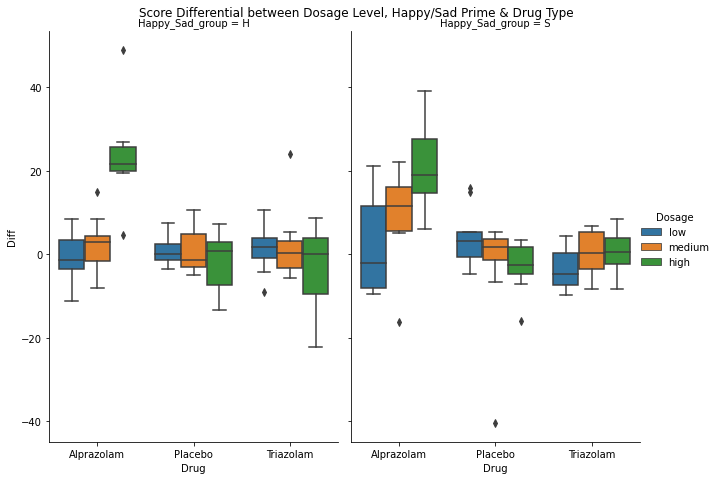

In [34]:
# plot with different doses & happy and sad group
fig = plt.figure(figsize=(10,7))
box_plot = sns.catplot(x='Drug', y='Diff', hue='Dosage', col='Happy_Sad_group', data=df, kind="box")
box_plot.fig.suptitle("Score Differential between Dosage Level, Happy/Sad Prime & Drug Type")
box_plot.fig.set_size_inches(10,7)

Observation: Similar to above, however there is no noticable difference in for the medium dosage in the happy group.

### 4.3.A Statistical Significance

In [ ]:
H_S_D = df[['Drug', 'Dosage', 'Happy_Sad_group', 'Score_Diff']].groupby(['Drug','Dosage', 'Happy_Sad_group'],as_index=False).mean()
H_S_D

In [77]:
T2_pivot = H_S_D.pivot(index=['Drug', 'Dosage'], columns='Happy_Sad_group')
T2_pivot

Score_Diff           
Happy_Sad_group            H          S
Drug       Dosage                      
Alprazolam high    23.581818  21.700000
           low     -0.609091   1.141667
           medium   2.118182   9.645455
Placebo    high    -1.700000  -2.590909
           low      0.709091   4.063636
           medium   1.054545  -2.563636
Triazolam  high    -3.427273   0.150000
           low      1.290909  -3.772727
           medium   1.581818   0.718182

In [ ]:
# Simplify with score differential 
T2 = df[['Drug', 'Dosage', 'Happy_Sad_group', 'Score_Diff']].groupby(['Drug','Dosage', 'Happy_Sad_group']) #Create frame for T-test
T2.head()

In [74]:
t7 = T2.get_group((('Alprazolam', 'medium', 'S')))['Score_Diff']
t8 = T2.get_group((('Placebo', 'low', 'S')))['Score_Diff']
st.ttest_ind(a=t7, b=t8, equal_var=True)

Ttest_indResult(statistic=1.5170485915130851, pvalue=0.14490260194679314)

In [78]:
t9 = T2.get_group(('Alprazolam', 'medium', 'H'))['Score_Diff']
st.ttest_ind(a=t7, b=t9, equal_var=True)

Ttest_indResult(statistic=2.059297583401018, pvalue=0.05272421404720512)

### 4.3.B Statistical Significance results

A. Medium dosage Alprazoloam with Sad prime only higher than low Placebo Sad prime with pvalue<0.15
<br>B. Medium Dosage Alprazolam with Sad prime higher than that with Happy prime with pvalue=0.053 thus it is significantly higher than all of the rest besides low Placebo Sad prime

## 5. Search for Major Group Discrepencies

Now to see if there are any major age discrepencies between the groups.

In [36]:
df_age = df[['age', 'Dosage', 'Drug', 'Happy_Sad_group']]

In [ ]:
df_age = df_age.groupby(['Dosage', 'Drug', 'Happy_Sad_group'],as_index=False).mean()
df_age

In [38]:
df_age_pivot = df_age.pivot(index=['Dosage','Drug'], columns='Happy_Sad_group')
df_age_pivot

age           
Happy_Sad_group            H          S
Dosage Drug                            
high   Alprazolam  41.363636  40.818182
       Placebo     39.636364  33.181818
       Triazolam   39.727273  44.800000
low    Alprazolam  36.000000  43.833333
       Placebo     35.636364  41.636364
       Triazolam   36.909091  38.454545
medium Alprazolam  36.181818  42.090909
       Placebo     38.181818  36.272727
       Triazolam   48.272727  38.636364

<Figure size 720x504 with 0 Axes>

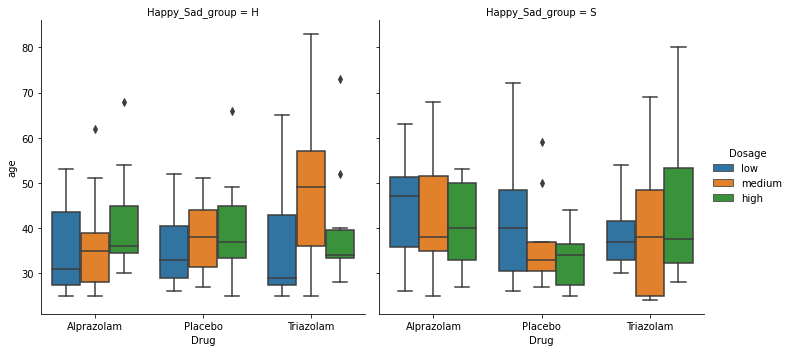

In [39]:
fig = plt.figure(figsize=(10,7))
sns.catplot(x='Drug', y='age', hue='Dosage', col='Happy_Sad_group', data=df, kind="box")

Some noticeable differences worth examining: T, Medium dose has significantly higher age than the rest, however this does not seem to matter because that group doesn't have any signifcantly variable scores from the rest. 

<AxesSubplot:xlabel='age', ylabel='Score_Diff'>

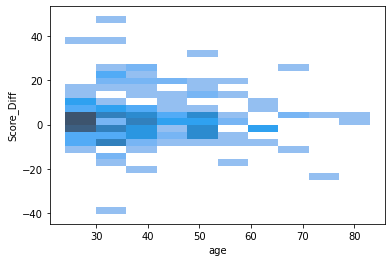

In [36]:
# does age have significant effect of the difference of scores
sns.histplot(x='age', y='Score_Diff', data=df)

### 5.1 Discrepency Conclusion

No major discrepencies based on age of participants

## 6. Conclusion

**Main questions of interest:**

How does each drug affect memory? 
<br>Those that took Alprazolam generally did better on the memory recall test after doing the drug.

Does the dosage level of the drug have an effect?
<br> Participants in the high dosage of Alprazolam group had scores improved more significantly than any other group (pvalue<0.0001). Participants in the medium dosage of Alprazolam group had scores improved more significantly than all of the other groups (pvalue<0.05) except for the Placebo group with the lowest dosage (pvalue=0.13) and the group with medium dosage of Triazolam (pvalue=0.058).

Does either prime have a significant effect?
<br> Medium Dosage Alprazolam with Sad prime higher than that with Happy prime with pvalue=0.053 thus it is significantly higher than all of the rest besides low Placebo Sad prime (pvalue<0.14)

Does the age of participants make a noticable difference on the drugs' effect?
<br> Age did not seem to be an effective factor.